### Study Area

In [1]:
import pandas as pd
import geopandas as gpd

path = "../original/gba_subdistricts/GBA.shp"

gba = gpd.read_file(path)

gba

,OBJECTID,CSMC,QXMC,CSBH,QXBH,JDBH,JDMC,Shape_Leng,Shape_Area,geometry
0,1,香港,黃大仙,8100,810001,810001000,黃大仙,16619.809631,9.315513e+06,"POLYGON ((209491.525 2474183.439, 209494.959 2..."
1,2,香港,葵青區,8100,810002,810002000,葵青區,52064.211812,2.365613e+07,"MULTIPOLYGON (((202634.339 2475578.232, 202652..."
2,3,香港,深水埗,8100,810003,810003000,深水埗,27065.529884,9.516363e+06,"POLYGON ((206123.569 2473705.365, 206240.982 2..."
3,4,香港,油尖旺,8100,810004,810004000,油尖旺,20971.201620,6.938797e+06,"MULTIPOLYGON (((206720.264 2471361.893, 206723..."
4,5,香港,九龍城,8100,810005,810005000,九龍城,29383.871753,1.009875e+07,"MULTIPOLYGON (((211182.933 2469971.953, 211180..."
...,...,...,...,...,...,...,...,...,...,...
648,649,深圳市,光明区,4403,440311,440311001,光明街道,84454.684642,5.551187e+07,"POLYGON ((189925.520 2515977.461, 189904.738 2..."
649,650,深圳市,宝安区,4403,440306,440306018,西乡街道,66507.895159,1.034359e+08,"MULTIPOLYGON (((172736.344 2496833.553, 172720..."
650,651,深圳市,龙华区,4403,440309,440309006,观澜街道,59797.894713,8.931983e+07,"POLYGON ((200917.262 2509704.829, 200817.836 2..."
651,652,珠海市,金湾区,4404,440404,440404400,联港工业区,19376.871731,6.321902e+06,"POLYGON ((115728.985 2449124.238, 115914.207 2..."


In [2]:
gba = gba.to_crs("EPSG:4326")

<Axes: >

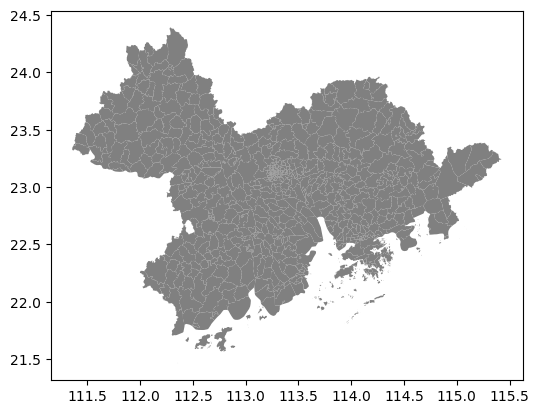

In [3]:
gba.plot(color='grey')

#### OD flows

In [18]:
path = "../original/gba_trajectory/grid/grid.shp"
grid = gpd.read_file(path)
grid

,OBJECTID,Join_Count,QXMC,CSMC,CSBH,QXBH,GWBH_500,GWBH_1000,GWBH_2000,KJCD,Shape_Leng,Shape_Area,geometry
0,1,1,台山市,江门市,4407,440781,276,138,69,500,2000.0,249999.999999,"POLYGON ((60977.368 2390541.594, 60977.368 239..."
1,2,1,台山市,江门市,4407,440781,277,138,69,500,2000.0,250000.000000,"POLYGON ((61477.368 2390541.594, 61477.368 239..."
2,3,1,台山市,江门市,4407,440781,278,139,69,500,2000.0,250000.000000,"POLYGON ((61977.368 2390541.594, 61977.368 239..."
3,4,1,台山市,江门市,4407,440781,281,140,70,500,2000.0,250000.000000,"POLYGON ((63477.368 2390541.594, 63477.368 239..."
4,5,1,台山市,江门市,4407,440781,282,141,70,500,2000.0,250000.000000,"POLYGON ((63977.368 2390541.594, 63977.368 239..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232623,232624,1,怀集县,肇庆市,4412,441224,522699,130725,32706,500,2000.0,249999.999999,"POLYGON ((24477.368 2704541.594, 24477.368 270..."
232624,232625,1,怀集县,肇庆市,4412,441224,523524,130722,32705,500,2000.0,250000.000001,"POLYGON ((20977.368 2705041.594, 20977.368 270..."
232625,232626,1,怀集县,肇庆市,4412,441224,523525,130722,32705,500,2000.0,250000.000000,"POLYGON ((21477.368 2705041.594, 21477.368 270..."
232626,232627,1,怀集县,肇庆市,4412,441224,523526,130723,32705,500,2000.0,250000.000002,"POLYGON ((21977.368 2705041.594, 21977.368 270..."


In [22]:
grid['QXMC'].value_counts()

惠东县    14835
台山市    14613
怀集县    14496
博罗县    11488
封开县    11188
       ...  
黃大仙       55
灣仔區       51
深水埗       48
九龍城       46
油尖旺       40
Name: QXMC, Length: 68, dtype: int64

In [27]:
grid.to_crs(gba.crs, inplace=True) #调整投影坐标系
grid.set_index('GWBH_500', inplace=True)
grid

,OBJECTID,Join_Count,QXMC,CSMC,CSBH,QXBH,GWBH_1000,GWBH_2000,KJCD,Shape_Leng,Shape_Area,geometry
GWBH_500,,,,,,,,,,,,
276,1,1,台山市,江门市,4407,440781,138,69,500,2000.0,249999.999999,"POLYGON ((112.76244 21.56398, 112.76231 21.568..."
277,2,1,台山市,江门市,4407,440781,138,69,500,2000.0,250000.000000,"POLYGON ((112.76726 21.56410, 112.76713 21.568..."
278,3,1,台山市,江门市,4407,440781,139,69,500,2000.0,250000.000000,"POLYGON ((112.77208 21.56423, 112.77195 21.568..."
281,4,1,台山市,江门市,4407,440781,140,70,500,2000.0,250000.000000,"POLYGON ((112.78653 21.56459, 112.78639 21.569..."
282,5,1,台山市,江门市,4407,440781,141,70,500,2000.0,250000.000000,"POLYGON ((112.79134 21.56472, 112.79121 21.569..."
...,...,...,...,...,...,...,...,...,...,...,...,...
522699,232624,1,怀集县,肇庆市,4412,441224,130725,32706,500,2000.0,249999.999999,"POLYGON ((112.31430 24.38184, 112.31413 24.386..."
523524,232625,1,怀集县,肇庆市,4412,441224,130722,32705,500,2000.0,250000.000001,"POLYGON ((112.27974 24.38527, 112.27957 24.389..."
523525,232626,1,怀集县,肇庆市,4412,441224,130722,32705,500,2000.0,250000.000000,"POLYGON ((112.28465 24.38542, 112.28448 24.389..."


In [30]:
# 合并并修改列名，以得到哪些 gird id 在 同一个 街道中

grid2gba = gba.sjoin(grid, how='inner')
grid2gba = grid2gba.drop(columns=['Join_Count', 'QXMC_right', 'CSMC_right', 'CSBH_right', 'QXBH_right', 'GWBH_1000', 'GWBH_2000', 'KJCD', 'Shape_Leng_right', 'Shape_Area_right', 'OBJECTID_right'])
grid2gba.columns = ['GBA_ID', 'CSMC', 'QXMC', 'CSBH', 'QXBH', 'JDBH', 'JDMC', 'Shape_Leng', 'Shape_Area', 'geometry', 'GWBH500']
grid2gba

,GBA_ID,CSMC,QXMC,CSBH,QXBH,JDBH,JDMC,Shape_Leng,Shape_Area,geometry,GWBH500
0,1,香港,黃大仙,8100,810001,810001000,黃大仙,16619.809631,9.315513e+06,"POLYGON ((114.17942 22.34905, 114.17946 22.349...",136190
4,5,香港,九龍城,8100,810005,810005000,九龍城,29383.871753,1.009875e+07,"MULTIPOLYGON (((114.19659 22.31134, 114.19657 ...",136190
0,1,香港,黃大仙,8100,810001,810001000,黃大仙,16619.809631,9.315513e+06,"POLYGON ((114.17942 22.34905, 114.17946 22.349...",136191
4,5,香港,九龍城,8100,810005,810005000,九龍城,29383.871753,1.009875e+07,"MULTIPOLYGON (((114.19659 22.31134, 114.19657 ...",136191
0,1,香港,黃大仙,8100,810001,810001000,黃大仙,16619.809631,9.315513e+06,"POLYGON ((114.17942 22.34905, 114.17946 22.349...",137022
...,...,...,...,...,...,...,...,...,...,...,...
652,653,肇庆市,怀集县,4412,441224,441224113,永固镇,97489.804489,1.893368e+08,"POLYGON ((112.13748 23.68595, 112.13649 23.682...",416141
652,653,肇庆市,怀集县,4412,441224,441224113,永固镇,97489.804489,1.893368e+08,"POLYGON ((112.13748 23.68595, 112.13649 23.682...",403693
652,653,肇庆市,怀集县,4412,441224,441224113,永固镇,97489.804489,1.893368e+08,"POLYGON ((112.13748 23.68595, 112.13649 23.682...",404523
652,653,肇庆市,怀集县,4412,441224,441224113,永固镇,97489.804489,1.893368e+08,"POLYGON ((112.13748 23.68595, 112.13649 23.682...",404524


In [34]:
grid2gba['GWBH500'].value_counts()

288255    6
284929    5
294099    4
290798    4
291597    4
         ..
92557     1
92558     1
93388     1
93389     1
405355    1
Name: GWBH500, Length: 232603, dtype: int64

<Axes: >

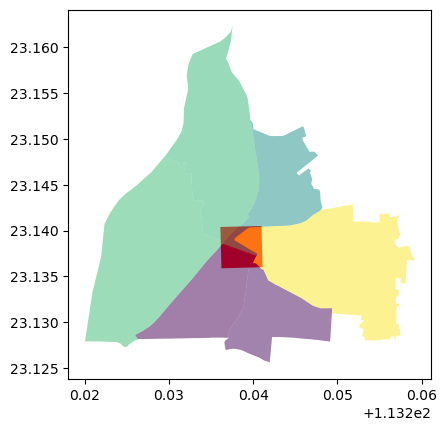

In [35]:
# example: 同一个网格同时交叠了多个街道

ax = grid.loc[[288255]].plot(color="r")
inter_list = grid2gba[grid2gba["GWBH500"]==288255].index
gba.loc[inter_list].plot("Shape_Leng",ax=ax, alpha=0.5)

In [36]:
import pandas as pd

# 读取2019年共41天，每天24小时的 OD 数据
move = pd.read_csv("../original/gba_trajectory/move_cnt.csv", index_col=0)
move

,O_GWBH_500,D_GWBH_500,time,num_total
0,8549,20216,13,1.0
1,8549,8591,17,1.0
2,8549,13554,22,1.0
3,8549,128475,15,1.0
4,8549,16046,19,1.0
...,...,...,...,...
169045,511062,386257,16,1.0
169046,511062,393743,7,1.0
169047,511062,402061,8,1.0
169048,511062,225194,16,2.0


In [40]:
# 统计得到一整天的值
move_day = move.groupby(['O_GWBH_500', 'D_GWBH_500'])['num_total'].sum().reset_index()
move_day

,O_GWBH_500,D_GWBH_500,num_total
0,5269,8549,1.0
1,5269,24409,1.0
2,5269,52683,1.0
3,5269,55167,1.0
4,5269,170969,28.0
...,...,...,...
16018641,511062,391246,1.0
16018642,511062,393743,1.0
16018643,511062,397104,1.0
16018644,511062,402057,2.0


In [43]:
move_day['num_total'].max()

25132.0

In [44]:
grid2gba[grid2gba["GWBH500"]==288255].index

Int64Index([93, 106, 170, 195, 212, 218], dtype='int64')

In [45]:
# 将格网编号映射到街道编号，并且保证多对一的映射关系

import numpy as np
from itertools import product # 笛卡尔积，可获得两两组合

# 创建新的DataFrame，通过笛卡尔积生成所有可能的组合
# 为了加快运算使用chunk机制
def process_chunk(chunk):
    new_rows = []
    for index, row in chunk.iterrows():
        o_ids = grid2gba[grid2gba["GWBH500"]==row['O_GWBH_500']].index  # 获取O对应的O_JD_id列表
        d_ids = grid2gba[grid2gba["GWBH500"]==row['D_GWBH_500']].index  # 获取D对应的D_JD_id列表
        for o_id, d_id in product(o_ids, d_ids):  # 生成所有(O_area_id, D_area_id)的组合
            new_rows.append((o_id, d_id, row['num_total']))  # 复制x值到每一行

    return pd.DataFrame(new_rows, columns=['O_JD_id', 'D_JD_id', 'num_total'])

chunk_size = 1000  # 选择合适的chunk大小，根据内存情况调整
chunks = np.array_split(move_day, len(move_day) // chunk_size + 1)

move_transformed = pd.concat([process_chunk(chunk) for chunk in chunks])

In [46]:
move_transformed

,O_JD_id,D_JD_id,num_total
0,328,328,1.0
1,328,328,1.0
2,328,329,1.0
3,328,335,1.0
4,328,100,28.0
...,...,...,...
1285,463,438,1.0
1286,463,437,1.0
1287,463,443,1.0
1288,463,438,2.0


In [47]:
move_transformed_gba = move_transformed.groupby(['O_JD_id', 'D_JD_id'])['num_total'].sum().reset_index()
move_transformed_gba

,O_JD_id,D_JD_id,num_total
0,9,9,9183.0
1,9,14,1180.0
2,9,18,7.0
3,9,19,5.0
4,9,20,105.0
...,...,...,...
238204,652,599,1.0
238205,652,604,1.0
238206,652,605,2.0
238207,652,606,1.0


In [49]:
move_transformed_gba.to_csv('../datasets/gba_move_cnt.csv')

In [2]:
import pandas as pd
move_gba = pd.read_csv('../datasets/gba_move_cnt.csv', index_col=0)
move_gba

,O_JD_id,D_JD_id,num_total
0,9,9,9183.0
1,9,14,1180.0
2,9,18,7.0
3,9,19,5.0
4,9,20,105.0
...,...,...,...
238204,652,599,1.0
238205,652,604,1.0
238206,652,605,2.0
238207,652,606,1.0


#### POI data

In [46]:
import pandas as pd
pois = pd.read_csv('../datasets/GBA_POI_level2.csv', index_col=0)
pois

,JDMC,ATM,KTV,三星级酒店,专科医院,世界遗产,中介,中国菜,中学,乒乓球,...,酒吧,银行,长途汽车,露营地,青旅,飞机,马术&赛马,驾校,高尔夫球,高等教育
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,黃大仙,37,0,0,13,0,42,258,25,0,...,4,31,0,0,0,0,1,0,0,3
2,葵青區,104,0,1,17,0,127,721,37,0,...,18,79,0,0,0,0,0,0,1,5
3,深水埗,93,0,1,20,0,263,794,39,0,...,19,96,0,0,2,0,1,3,0,9
4,油尖旺,85,45,28,67,0,479,1442,30,1,...,160,144,0,0,0,0,1,1,0,13
5,九龍城,130,5,7,44,0,343,1080,76,2,...,107,158,1,0,1,1,1,4,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,光明街道,22,2,0,17,0,48,683,10,2,...,7,14,0,0,0,0,1,25,1,5
650,西乡街道,87,36,8,138,0,295,4534,19,2,...,60,69,3,0,10,0,0,97,8,3
651,观澜街道,55,23,4,73,0,185,3038,22,1,...,21,37,1,1,6,0,0,113,8,2


In [51]:
import torch
import numpy as np
pois = torch.tensor(pois.values[:,1:].astype(np.float32))

pois.shape

torch.Size([653, 138])

In [ ]:
torch.save(pois, "../datasets/poi_feature.pt")

In [13]:
import torch
torch.load("../datasets/poi_feature.pt").float()

tensor([[ 37.,   0.,   0.,  ...,   0.,   0.,   3.],
        [104.,   0.,   1.,  ...,   0.,   1.,   5.],
        [ 93.,   0.,   1.,  ...,   3.,   0.,   9.],
        ...,
        [ 55.,  23.,   4.,  ..., 113.,   8.,   2.],
        [  3.,   2.,   0.,  ...,   4.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.]])

#### GDP data

generate label for aggregation before GDP computing.

In [4]:
# handel HK and MO
hk_label = gba.loc[gba['CSMC'] == '香港', 'QXBH'].iloc[0] if '香港' in gba['CSMC'].values else None
mo_label = gba.loc[gba['CSMC'] == '澳门', 'QXBH'].iloc[0] if '澳门' in gba['CSMC'].values else None

# dropout
def generate_temp_label(row):
    if row['CSMC'] == '香港':
        return hk_label
    elif row['CSMC'] == '澳门':
        return mo_label
    else:
        return row['QXBH']

gba['QXBH_temp'] = gba.apply(generate_temp_label, axis=1)
gba['label'] = gba.groupby('QXBH_temp').ngroup()
gba

,OBJECTID,CSMC,QXMC,CSBH,QXBH,JDBH,JDMC,Shape_Leng,Shape_Area,geometry,QXBH_temp,label
0,1,香港,黃大仙,8100,810001,810001000,黃大仙,16619.809631,9.315513e+06,"POLYGON ((114.17942 22.34905, 114.17946 22.349...",810001,50
1,2,香港,葵青區,8100,810002,810002000,葵青區,52064.211812,2.365613e+07,"MULTIPOLYGON (((114.11265 22.36046, 114.11283 ...",810001,50
2,3,香港,深水埗,8100,810003,810003000,深水埗,27065.529884,9.516363e+06,"POLYGON ((114.14684 22.34417, 114.14796 22.345...",810001,50
3,4,香港,油尖旺,8100,810004,810004000,油尖旺,20971.201620,6.938797e+06,"MULTIPOLYGON (((114.15306 22.32312, 114.15309 ...",810001,50
4,5,香港,九龍城,8100,810005,810005000,九龍城,29383.871753,1.009875e+07,"MULTIPOLYGON (((114.19659 22.31134, 114.19657 ...",810001,50
...,...,...,...,...,...,...,...,...,...,...,...,...
648,649,深圳市,光明区,4403,440311,440311001,光明街道,84454.684642,5.551187e+07,"POLYGON ((113.98146 22.72267, 113.98126 22.722...",440311,19
649,650,深圳市,宝安区,4403,440306,440306018,西乡街道,66507.895159,1.034359e+08,"MULTIPOLYGON (((113.81830 22.54675, 113.81814 ...",440306,14
650,651,深圳市,龙华区,4403,440309,440309006,观澜街道,59797.894713,8.931983e+07,"POLYGON ((114.08955 22.66807, 114.08860 22.667...",440309,17
651,652,珠海市,金湾区,4404,440404,440404400,联港工业区,19376.871731,6.321902e+06,"POLYGON ((113.27635 22.10475, 113.27813 22.105...",440404,22


In [5]:
gba[gba['CSMC']=='澳门']

,OBJECTID,CSMC,QXMC,CSBH,QXBH,JDBH,JDMC,Shape_Leng,Shape_Area,geometry,QXBH_temp,label
18,19,澳门,澳门,8200,820000,820000000,澳门,35325.571196,5.290703e+07,"MULTIPOLYGON (((113.54938 22.11024, 113.54832 ...",820000,51


In [16]:
# save label
import numpy as np

gba.label.values.tofile('../datasets/lable.bin')

In [8]:
gba.loc[gba['label'] == 50, 'QXMC'] = '香港'
qx2label = gba.groupby(['QXMC', 'label'], as_index=False).first()
qx2label = qx2label[['QXMC', 'label']]
qx2label

,QXMC,label
0,三水区,26
1,东莞市,48
2,中山市,49
3,从化区,9
4,光明区,19
5,南山区,13
6,南沙区,8
7,南海区,24
8,博罗县,45
9,台山市,31


combine 3 industry GDP data

> https://stats.gd.gov.cn/

In [28]:
gdp = qx2label.copy()
gdp = gdp.assign(_1stIn=None, _2ndIn=None, _3rdIn=None)

In [29]:
raw_gdp = pd.read_excel('../original/guangdong_3industry.xls', sheet_name=None)

for sheet_name, df in raw_gdp.items():
    if sheet_name == '排序': break
    for index, row in df.iterrows():
        qxmc = str(row.iloc[0]).strip()
        if qxmc in qx2label.QXMC.values:
            gdp.loc[gdp['QXMC']==qxmc, '_1stIn'] = row[2]
            gdp.loc[gdp['QXMC']==qxmc, '_2ndIn'] = row[4]
            gdp.loc[gdp['QXMC']==qxmc, '_3rdIn'] = row[6]

gdp


,QXMC,label,_1stIn,_2ndIn,_3rdIn
0,三水区,26,45.662337,1068.652032,358.117549
1,东莞市,48,NaN,NaN,NaN
2,中山市,49,NaN,NaN,NaN
3,从化区,9,35.7893,130.039,245.0886
4,光明区,19,2.325649,1016.966753,407.809751
5,南山区,13,1.082774,2459.849502,5574.949989
6,南沙区,8,72.2789,995.4958,1184.808
7,南海区,24,66.241199,2006.088315,1658.261203
8,博罗县,45,88.503934,436.475349,276.408391
9,台山市,31,113.351935,203.859297,199.289484


fill empty data

In [30]:
# 1. Hongkong
# https://www.censtatd.gov.hk/
gdp.loc[gdp['QXMC']=='香港', '_1stIn'] = 12.78
gdp.loc[gdp['QXMC']=='香港', '_2ndIn'] = 1512.88
gdp.loc[gdp['QXMC']=='香港', '_3rdIn'] = 21999.51

# 2. Macao
# https://www.dsec.gov.mo/zh-MO/
gdp.loc[gdp['QXMC']=='澳门', '_1stIn'] = 0.
gdp.loc[gdp['QXMC']=='澳门', '_2ndIn'] = 124.53
gdp.loc[gdp['QXMC']=='澳门', '_3rdIn'] = 1492.59


# 3. Dongguang
# https://tjj.dg.gov.cn/ 
gdp.loc[gdp['QXMC']=='东莞市', '_1stIn'] = 36.50
gdp.loc[gdp['QXMC']=='东莞市', '_2ndIn'] = 6513.64
gdp.loc[gdp['QXMC']=='东莞市', '_3rdIn'] = 4650.18

# 4. Zhongshan
# https://stats.zs.gov.cn/
gdp.loc[gdp['QXMC']=='中山市', '_1stIn'] = 89.20
gdp.loc[gdp['QXMC']=='中山市', '_2ndIn'] = 1795.25
gdp.loc[gdp['QXMC']=='中山市', '_3rdIn'] = 1746.83

# 5. Yuexiu
gdp.loc[gdp['QXMC']=='越秀区', '_1stIn'] = 0.

gdp = gdp.sort_values(by='label').set_index('label')

In [31]:
gdp.to_csv('../datasets/gba_3gdp.csv')
gdp

,QXMC,_1stIn,_2ndIn,_3rdIn
label,,,,
0,荔湾区,5.5359,351.4593,858.57
1,越秀区,0.0,126.0538,3524.131
2,海珠区,1.1553,450.6864,2050.6822
3,天河区,2.579518,447.333477,5765.807406
4,白云区,36.5549,563.9812,1875.6658
5,黄埔区,5.1923,2529.1454,1779.4175
6,番禺区,39.7522,1016.191,1649.5258
7,花都区,52.0627,762.201,956.5427
8,南沙区,72.2789,995.4958,1184.808


#### SVI data

In [2]:
# (optinal) change Dir. for import dataset 

import os
os.chdir("../")

Show picture & check dataloader

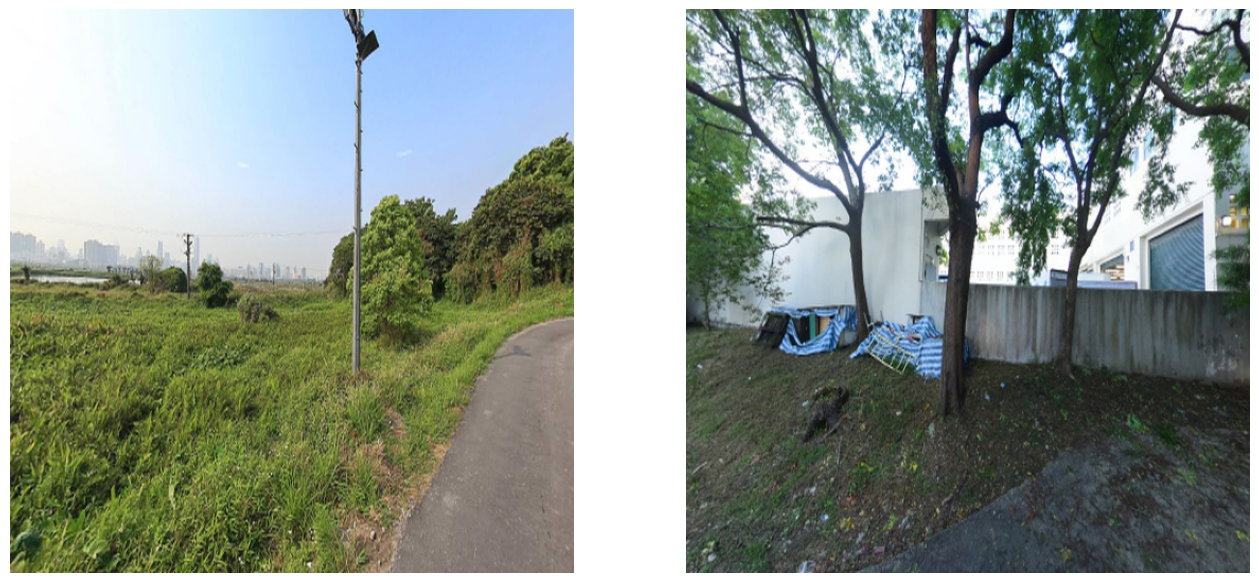

In [2]:
from datasets.panoramic import ViewDataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

loader = DataLoader(ViewDataset(city='香港', district='北区', length=200, set_size=512),batch_size=2)

for batch_idx, datas in enumerate(loader):
    images = datas
    break

plt.figure(figsize=(16, 8))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i].permute(1, 2, 0))  # Tensor: CxHxW -> HxWxC for plt.imshow
    plt.axis('off')
plt.show()
